In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import pickle
with open("C:/Users/passion/jupyter/열정에 시동/result.pickle","rb") as fr:
    result=pickle.load(fr)

In [3]:
with open("C:/Users/passion/jupyter/열정에 시동/RFML.pickle","rb") as fr:
    RFML=pickle.load(fr)

In [4]:
for a in range(2):
    for b in range (2):
        for c in range(2):
            for d in range(3):
                globals()['group'+str(a)+str(b)+str(c)+str(d)] = RFML[(RFML["Recency_R"] == a) & (RFML["Frequency_F"] == b) & (RFML["Monetary_M"] == c) & (RFML["LPAY_USE"] == d) ]
                globals()['cust'+str(a)+str(b)+str(c)+str(d)] = globals()['group'+str(a)+str(b)+str(c)+str(d)]['CUST']
                globals()['transaction'+str(a)+str(b)+str(c)+str(d)] = pd.merge(result, globals()['cust'+str(a)+str(b)+str(c)+str(d)])

제휴사를 볼때 2개의 기준으로 봐야한다 <br>
1. lip membership에서 제휴사의 혜택을 주기 위해서는 같은 제휴사에서의 lpay를 썼을때와 안 썻을때의 비율을 계산해본다
2. nl 사용자들에게 엘페이 권유를 할때 nl사용자들의 제휴사를 보고 서비스를 만들어준다.

일단 2번을 먼저 해본다

In [5]:
transaction1110_u = transaction1110[(transaction1110['COP_C']>=200)]
transaction1010_u = transaction1010[(transaction1010['COP_C']>=200)]

In [7]:
lpay_nl_u = pd.concat([transaction1110_u,transaction1010_u], axis = 0)
lpay_nl_u

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,PD_C,BUY_CT,S_ZON_HLV,DE_DT,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
353,M646853852,0,40,13,6000,410,1,4000,1,5,2021-06-04,6,4,4,10,NULL,NULL,NULL,0
354,M646853852,0,40,13,5700,410,1,4000,1,5,2021-11-07,11,7,6,10,NULL,NULL,NULL,0
355,M646853852,0,40,13,6000,410,1,4000,1,5,2021-11-09,11,9,1,10,NULL,NULL,NULL,0
356,M646853852,0,40,13,6400,410,1,4000,1,5,2021-06-21,6,21,0,10,NULL,NULL,NULL,0
357,M646853852,0,40,13,9000,410,1,4000,1,5,2021-06-28,6,28,0,12,NULL,NULL,NULL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131135,M058847456,0,40,10,5400,410,1,4000,1,11,2021-08-14,8,14,5,12,NULL,NULL,NULL,0
131136,M058847456,0,40,10,15700,410,1,4000,1,11,2021-10-14,10,14,3,16,NULL,NULL,NULL,0
131137,M058847456,0,40,10,15300,410,1,4000,1,11,2021-11-09,11,9,1,16,NULL,NULL,NULL,0
131138,M058847456,0,40,10,9300,410,1,4000,1,11,2021-09-24,9,24,4,10,NULL,NULL,NULL,0


<AxesSubplot:xlabel='COP_C', ylabel='count'>

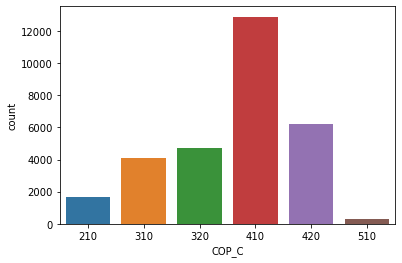

In [9]:
sns.countplot(x="COP_C", data = lpay_nl_u)

이것 만으로 어떻게 lpay를 첫 구매할때의 혜택을 주니??

이걸 가지고 논쟁을 해봐야하고 1번을 한번 보자

In [10]:
membership = pd.concat([transaction1111,transaction1112,transaction1011,transaction1012], axis = 0)
membership

,CUST,MA_FEM_DV,AGES,C_ZON_HLV,BUY_AM,COP_C,CHNL_DV,PD_C,BUY_CT,S_ZON_HLV,DE_DT,MONTH,DATE,DAY,DE_HR,CLAC_HLV_NM,CLAC_MCLS_NM,PD_NM,LPAY_USE
0,M686795542,0,20,16,34800,110,1,952,1,16,2021-01-01,1,1,4,11,여성의류,여성의류상의,여성베스트,0
1,M686795542,0,20,16,47100,110,1,949,1,16,2021-01-03,1,3,6,18,여성의류,여성의류상의,여성티셔츠/탑,0
2,M686795542,0,20,16,6000,110,1,1689,1,16,2021-01-04,1,4,0,11,테넌트/음식점,식당,디저트,0
3,M686795542,0,20,16,5500,110,1,1699,1,16,2021-01-04,1,4,0,12,테넌트/음식점,푸드코트,푸드코트컨세션,0
4,M686795542,0,20,16,34800,110,1,952,1,16,2021-01-05,1,5,1,19,여성의류,여성의류상의,여성베스트,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54551,M873779359,0,30,16,66500,110,1,6000,1,0,2021-03-17,3,17,2,17,NULL,NULL,NULL,1
54552,M873779359,0,30,16,9700,610,2,6000,1,0,2021-10-18,10,18,0,22,NULL,NULL,NULL,1
54553,M873779359,0,30,16,93858,610,2,6000,1,0,2021-09-06,9,6,0,14,NULL,NULL,NULL,1
54554,M873779359,0,30,16,92400,610,2,6000,1,0,2021-10-11,10,11,0,12,NULL,NULL,NULL,1


<AxesSubplot:xlabel='COP_C', ylabel='count'>

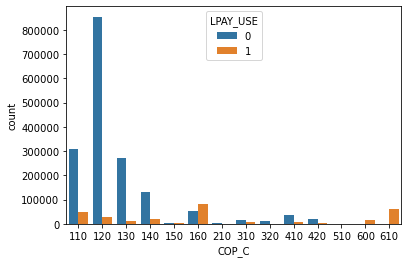

In [11]:
sns.countplot(x="COP_C",hue = 'LPAY_USE', data = membership)

아무튼 뭐 이런데 제휴사를 마케팅하기 위해서는 그 제휴사의 특성을 알아야 우리가 할 수가 있다. <br>
제한적인 정보로 그냥 빈도수나 연관규칙으로는 마케팅이 거의 불가능하다고 볼수 있다.